In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from prophet import Prophet
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Get sensitive information from environment variables
DB_CONNECTION_STRING = os.getenv('DB_CONNECTION_STRING')

# Load the data with anomalies from the database
def load_anomaly_data():
    engine = create_engine(DB_CONNECTION_STRING)
    query = "SELECT * FROM anomaly_detected_market_data"
    anomaly_data = pd.read_sql(query, engine)
    return anomaly_data

# Load the data
df = load_anomaly_data()

# Show the first few rows of the data
df.head()

,symbol,avg_price,max_price,min_price,avg_change_percent,anomaly
0,ALGN,207.66,207.66,207.66,-1.494234,normal
1,ARM,142.41,142.41,142.41,-6.665355,normal
2,BA,157.06,157.06,157.06,-1.763830,normal
3,CLS,57.47,57.47,57.47,2.625000,normal
4,IBM,232.75,232.75,232.75,0.215285,normal


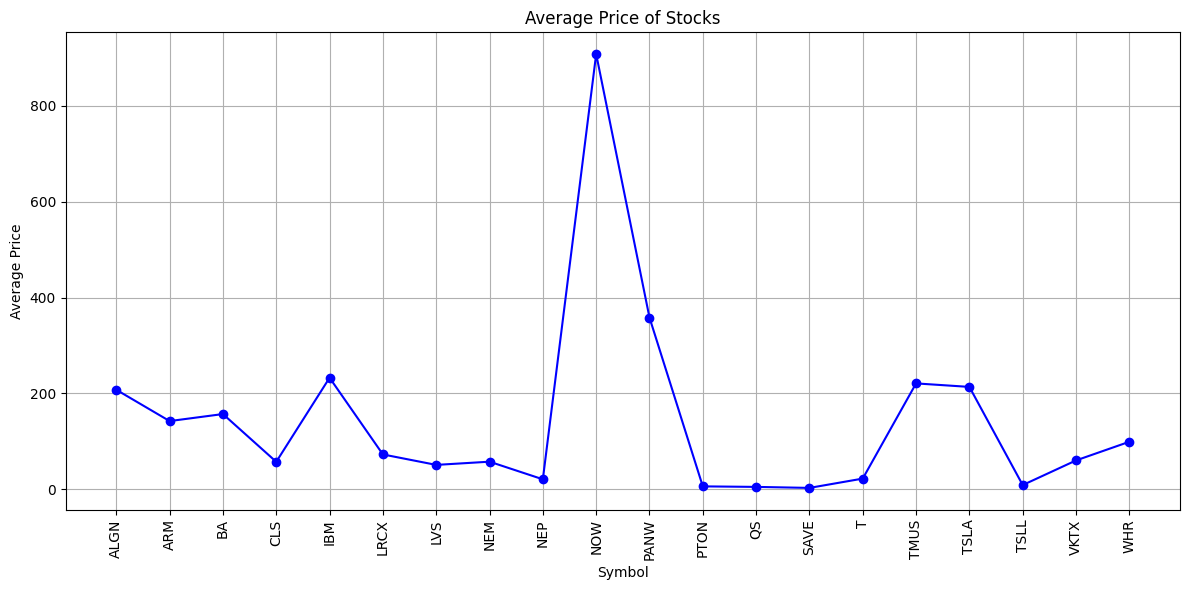

In [2]:
# Plot the average price of the stocks
plt.figure(figsize=(12, 6))
plt.plot(df['symbol'], df['avg_price'], label='Average Price', color='blue', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Symbol')
plt.ylabel('Average Price')
plt.title('Average Price of Stocks')
plt.grid(True)
plt.tight_layout()
plt.show()

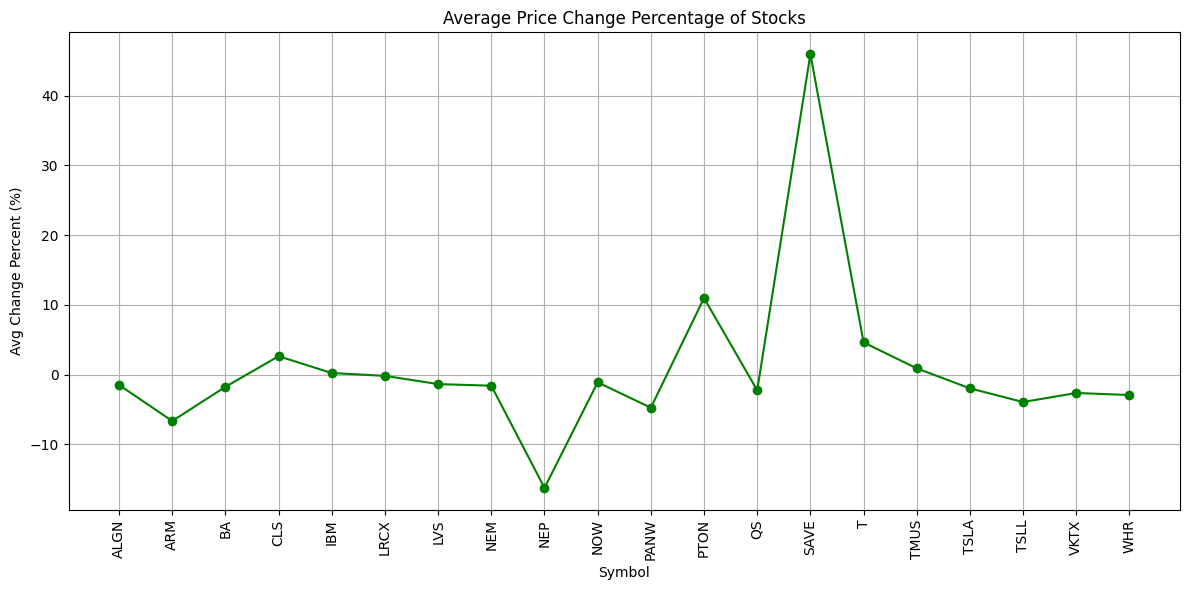

In [3]:
# Plot price change percentage
plt.figure(figsize=(12, 6))
plt.plot(df['symbol'], df['avg_change_percent'], label='Avg Change Percent', color='green', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Symbol')
plt.ylabel('Avg Change Percent (%)')
plt.title('Average Price Change Percentage of Stocks')
plt.grid(True)
plt.tight_layout()
plt.show()

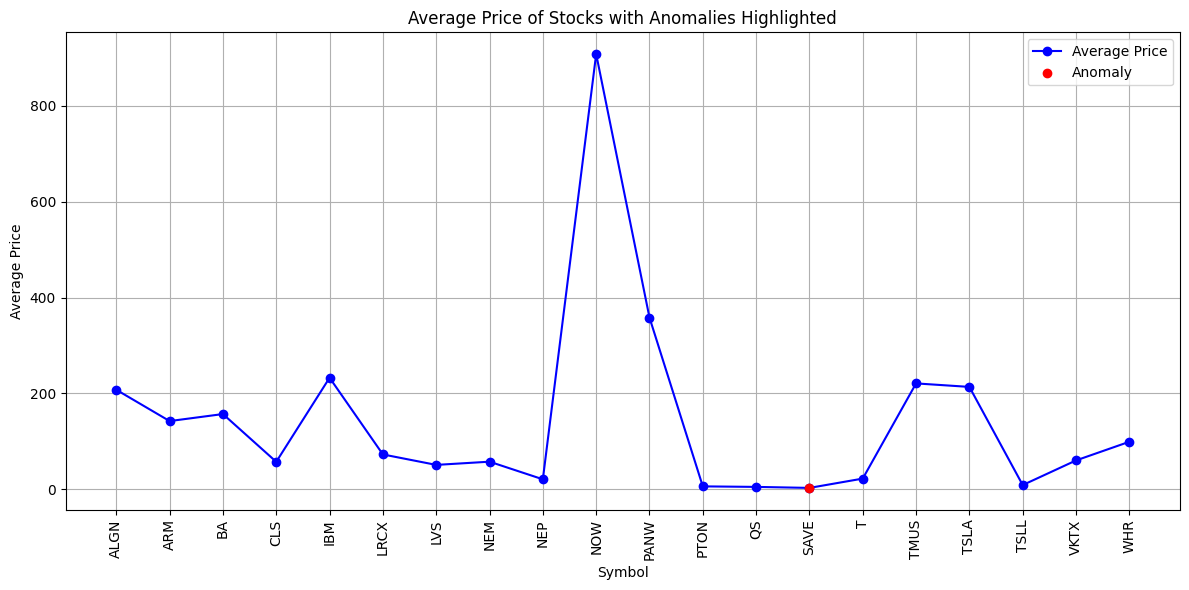

In [4]:
# Identify anomalies
anomalies = df[df['anomaly'] == 'anomaly']

# Highlight anomalies on the average price plot
plt.figure(figsize=(12, 6))
plt.plot(df['symbol'], df['avg_price'], label='Average Price', color='blue', marker='o')
plt.scatter(anomalies['symbol'], anomalies['avg_price'], color='red', label='Anomaly', zorder=5)
plt.xticks(rotation=90)
plt.xlabel('Symbol')
plt.ylabel('Average Price')
plt.title('Average Price of Stocks with Anomalies Highlighted')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

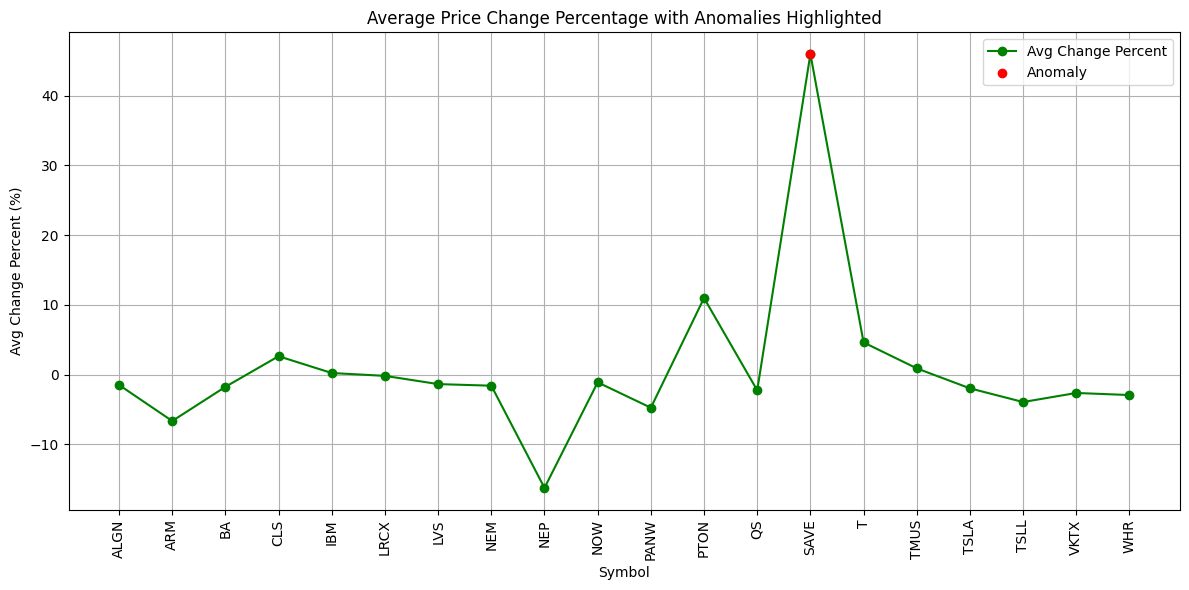

In [5]:
# Highlight anomalies on the price change percentage plot
plt.figure(figsize=(12, 6))
plt.plot(df['symbol'], df['avg_change_percent'], label='Avg Change Percent', color='green', marker='o')
plt.scatter(anomalies['symbol'], anomalies['avg_change_percent'], color='red', label='Anomaly', zorder=5)
plt.xticks(rotation=90)
plt.xlabel('Symbol')
plt.ylabel('Avg Change Percent (%)')
plt.title('Average Price Change Percentage with Anomalies Highlighted')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()